## 17-4. 내가 원하는 숫자 이미지 만들기 (1) Generator 구성하기

### 데이터 준비하기

In [1]:
# https://github.com/thisisiron/TF2-GAN

In [2]:
# !pip install tensorflow-dataset

In [3]:
import tensorflow_datasets as tfds


# mnist, info =  tfds.load(
#     "mnist", split="train", with_info=True
# )

# fig = tfds.show_examples(mnist, info)

In [4]:
import tensorflow as tf

# BATCH_SIZE = 128

# def gan_preprocessing(data):
#     image = data["image"]
#     image = tf.cast(image, tf.float32)
#     image = (image / 127.5) - 1
#     return image

# def cgan_preprocessing(data):
#     image = data["image"]
#     image = tf.cast(image, tf.float32)
#     image = (image / 127.5) - 1
    
#     label = tf.one_hot(data["label"], 10)
#     return image, label

# gan_datasets = mnist.map(gan_preprocessing).shuffle(1000).batch(BATCH_SIZE)
# cgan_datasets = mnist.map(cgan_preprocessing).shuffle(100).batch(BATCH_SIZE)
# print("✅")

In [5]:
import matplotlib.pyplot as plt

# for i,j in cgan_datasets : break

# # 이미지 i와 라벨 j가 일치하는지 확인해 봅니다.     
# print("Label :", j[0])
# print("Image Min/Max :", i.numpy().min(), i.numpy().max())
# plt.imshow(i.numpy()[0,...,0], plt.cm.gray)

#### GAN Generator 구성하기

In [6]:
from tensorflow.keras import layers, Input, Model

# class GeneratorGAN(Model):
#     def __init__(self):
#         super(GeneratorGAN, self).__init__()

#         self.dense_1 = layers.Dense(128, activation='relu')
#         self.dense_2 = layers.Dense(256, activation='relu')
#         self.dense_3 = layers.Dense(512, activation='relu')
#         self.dense_4 = layers.Dense(28*28*1, activation='tanh')

#         self.reshape = layers.Reshape((28, 28, 1))

#     def call(self, noise):
#         out = self.dense_1(noise)
#         out = self.dense_2(out)
#         out = self.dense_3(out)
#         out = self.dense_4(out)
#         return self.reshape(out)

# print("✅")

#### cGAN Generator 구성하기

In [7]:
# class GeneratorCGAN(Model):
#     def __init__(self):
#         super(GeneratorCGAN, self).__init__()
        
#         self.dense_z = layers.Dense(256, activation='relu')
#         self.dense_y = layers.Dense(256, activation='relu')
#         self.combined_dense = layers.Dense(512, activation='relu')
#         self.final_dense = layers.Dense(28 * 28 * 1, activation='tanh')
#         self.reshape = layers.Reshape((28, 28, 1))

#     def call(self, noise, label):
#         noise = self.dense_z(noise)
#         label = self.dense_y(label)
#         out = self.combined_dense(tf.concat([noise, label], axis=-1))
#         out = self.final_dense(out)
#         return self.reshape(out)
    
# print("✅")

## 17-5. 내가 원하는 숫자 이미지 만들기 (2) Discriminator 구성하기

#### GAN Discriminator 구성하기

In [8]:
# class DiscriminatorGAN(Model):
#     def __init__(self):
#         super(DiscriminatorGAN, self).__init__()
#         self.flatten = layers.Flatten()
        
#         self.blocks = []
#         for f in [512, 256, 128, 1]:
#             self.blocks.append(
#                 layers.Dense(f, activation=None if f==1 else "relu")
#             )
        
#     def call(self, x):
#         x = self.flatten(x)
#         for block in self.blocks:
#             x = block(x)
#         return x
    
# print("✅")

#### cGAN Discriminator 구성하기

cGAN의 Discriminator는 Maxout이라는레이어가 사용됨

![](https://d3s0tskafalll9.cloudfront.net/media/images/e-25-4-1.max-800x600.png)

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/e-25-4-2.png)

2개의 fully-connected 레이어를 사용할 때 Maxout을 식으로 표현

$$max(w_1^Tx+b_1,\ w_2^Tx+b_2)$$

In [9]:
# class Maxout(layers.Layer):
#     def __init__(self, units, pieces):
#         super(Maxout, self).__init__()
#         self.dense = layers.Dense(units*pieces, activation="relu")
#         self.dropout = layers.Dropout(.5)    
#         self.reshape = layers.Reshape((-1, pieces, units))
    
#     def call(self, x):
#         x = self.dense(x)
#         x = self.dropout(x)
#         x = self.reshape(x)
#         return tf.math.reduce_max(x, axis=2)

# print("✅")

In [10]:
# class DiscriminatorCGAN(Model):
#     def __init__(self):
#         super(DiscriminatorCGAN, self).__init__()
#         self.flatten = layers.Flatten()
        
#         self.image_block = Maxout(240, 5)
#         self.label_block = Maxout(50, 5)
#         self.combine_block = Maxout(240, 4)
        
#         self.dense = layers.Dense(1, activation=None)
    
#     def call(self, image, label):
#         image = self.flatten(image)
#         image = self.image_block(image)
#         label = self.label_block(label)
#         x = layers.Concatenate()([image, label])
#         x = self.combine_block(x)
#         return self.dense(x)
    
# print("✅")

## 17-6. 내가 원하는 숫자 이미지 만들기 (3) 학습 및 테스트하기

#### GAN, cGAN 각각의 모델 학습에 공통적으로 필요한 loss function과 optimizer를 정의

In [11]:
from tensorflow.keras import optimizers, losses

# bce = losses.BinaryCrossentropy(from_logits=True)

# def generator_loss(fake_output):
#     return bce(tf.ones_like(fake_output), fake_output)

# def discriminator_loss(real_output, fake_output):
#     return bce(tf.ones_like(real_output), real_output) + bce(tf.zeros_like(fake_output), fake_output)

# gene_opt = optimizers.Adam(1e-4)
# disc_opt = optimizers.Adam(1e-4)    
 




# print("✅")

#### GAN으로 MNIST 학습하기

In [12]:
# gan_generator = GeneratorGAN()
# gan_discriminator = DiscriminatorGAN()

# @tf.function()
# def gan_step(real_images):
#     noise = tf.random.normal([real_images.shape[0], 100])
    
#     with tf.GradientTape(persistent=True) as tape:
#         # Generator를 이용해 가짜 이미지 생성
#         fake_images = gan_generator(noise)
#         # Discriminator를 이용해 진짜 및 가짜이미지를 각각 판별
#         real_out = gan_discriminator(real_images)
#         fake_out = gan_discriminator(fake_images)
#         # 각 손실(loss)을 계산
#         gene_loss = generator_loss(fake_out)
#         disc_loss = discriminator_loss(real_out, fake_out)
#     # gradient 계산
#     gene_grad = tape.gradient(gene_loss, gan_generator.trainable_variables)
#     disc_grad = tape.gradient(disc_loss, gan_discriminator.trainable_variables)
#     # 모델 학습
#     gene_opt.apply_gradients(zip(gene_grad, gan_generator.trainable_variables))
#     disc_opt.apply_gradients(zip(disc_grad, gan_discriminator.trainable_variables))
#     return gene_loss, disc_loss

# print("✅")

In [13]:
# EPOCHS = 1
# for epoch in range(1, EPOCHS+1):
#     for i, images in enumerate(gan_datasets):
#         gene_loss, disc_loss = gan_step(images)

#         if (i+1) % 100 == 0:
#             print(f"[{epoch}/{EPOCHS} EPOCHS, {i+1} ITER] G:{gene_loss}, D:{disc_loss}")

In [14]:
# import numpy as np

# noise = tf.random.normal([10, 100])

# output = gan_generator(noise)
# output = np.squeeze(output.numpy())

# plt.figure(figsize=(15,6))
# for i in range(1, 11):
#     plt.subplot(2,5,i)
#     plt.imshow(output[i-1])

In [15]:
# !mkdir -p ~/aiffel/conditional_generation/gan
# !cp ~/data/gan/GAN_500.zip ~/aiffel/conditional_generation/gan/
# !cd ~/aiffel/conditional_generation/gan && unzip GAN_500.zip

In [16]:
# #학습데이터 불러오기
# from pathlib import Path
# import os

# # weight_path = os.getenv('HOME')+'/aiffel/conditional_generation/gan/GAN_500'
# weight_path = Path.joinpath(Path.cwd(),'gan','GAN_500')


# noise = tf.random.normal([10, 100]) 

# gan_generator = GeneratorGAN()
# gan_generator.load_weights(weight_path)

# output = gan_generator(noise)
# output = np.squeeze(output.numpy())

# plt.figure(figsize=(15,6))
# for i in range(1, 11):
#     plt.subplot(2,5,i)
#     plt.imshow(output[i-1])

#### cGAN으로 MNIST 학습하기

위에서 실행했던 GAN 학습처럼 약간의 학습으로는 제대로 된 생성 결과를 얻을 수 없음

In [17]:
# cgan_generator = GeneratorCGAN()
# cgan_discriminator = DiscriminatorCGAN()

# @tf.function()
# def cgan_step(real_images, labels):
#     noise = tf.random.normal([real_images.shape[0], 100])
    
#     with tf.GradientTape(persistent=True) as tape:
#         fake_images = cgan_generator(noise, labels)
        
#         real_out = cgan_discriminator(real_images, labels)
#         fake_out = cgan_discriminator(fake_images, labels)
        
#         gene_loss = generator_loss(fake_out)
#         disc_loss = discriminator_loss(real_out, fake_out)
    
#     gene_grad = tape.gradient(gene_loss, cgan_generator.trainable_variables)
#     disc_grad = tape.gradient(disc_loss, cgan_discriminator.trainable_variables)
    
#     gene_opt.apply_gradients(zip(gene_grad, cgan_generator.trainable_variables))
#     disc_opt.apply_gradients(zip(disc_grad, cgan_discriminator.trainable_variables))
#     return gene_loss, disc_loss


# EPOCHS = 1
# for epoch in range(1, EPOCHS+1):
    
#     for i, (images, labels) in enumerate(cgan_datasets):
#         gene_loss, disc_loss = cgan_step(images, labels)
    
#         if (i+1) % 100 == 0:
#             print(f"[{epoch}/{EPOCHS} EPOCHS, {i} ITER] G:{gene_loss}, D:{disc_loss}")

시간을 아끼기 위해 위 코드로 500 epoch 학습한 가중치를 불러옴

In [18]:
# !mkdir -p ~/aiffel/conditional_generation/cgan
# !cp ~/data/cgan/CGAN_500.zip ~/aiffel/conditional_generation/cgan/
# !cd ~/aiffel/conditional_generation/cgan && unzip CGAN_500.zip

In [19]:
# number =  0 # TODO : 생성할 숫자를 입력해 주세요!!

# # weight_path = os.getenv('HOME')+'/aiffel/conditional_generation/cgan/CGAN_500'
# weight_path = Path.joinpath(Path.cwd(),'cgan','CGAN_500')
# noise = tf.random.normal([10, 100])

# label = tf.one_hot(number, 10)
# label = tf.expand_dims(label, axis=0)
# label = tf.repeat(label, 10, axis=0)

# generator = GeneratorCGAN()
# generator.load_weights(weight_path)

# output = generator(noise, label)
# output = np.squeeze(output.numpy())

# plt.figure(figsize=(15,6))
# for i in range(1, 11):
#     plt.subplot(2,5,i)
#     plt.imshow(output[i-1])

## 17-7. GAN의 입력에 이미지를 넣는다면? Pix2Pix

Pix2Pix는 이미지를 입력으로 하여 원하는 다른 형태의 이미지로 변환시킬 수 있는 GAN 모델

https://arxiv.org/pdf/1611.07004.pdf

![](https://d3s0tskafalll9.cloudfront.net/media/images/p2p_results.max-800x600.png)

노이즈와 레이블 정보를 함께 입력했던 cGAN은 fully-connected 레이어를 연속적으로 쌓아 만들었지만, 이미지 변환이 목적인 Pix2Pix는 이미지를 다루는데 효율적인 convolution 레이어를 활용

#### Pix2Pix (Generator)

이미지를 입력받아 변환된 이미지를 출력 - 입력 이미지와 변환된 이미지의 크기는 동일

![](https://d3s0tskafalll9.cloudfront.net/media/images/p2p_generator.max-800x600.png)

U-Net 구조

![](https://d3s0tskafalll9.cloudfront.net/media/images/p2p_generator_unet.max-800x600.png)

Encoder와 Decoder가 연결(skip connection)되어있음.

![](https://d3s0tskafalll9.cloudfront.net/media/images/p2p_result_loss.max-800x600.png)

https://medium.com/@msmapark2/u-net-%EB%85%BC%EB%AC%B8-%EB%A6%AC%EB%B7%B0-u-net-convolutional-networks-for-biomedical-image-segmentation-456d6901b28a

L1 이라 쓰여있는 Generator만으로 생성된 결과는 매우 흐릿합니다. 이미지를 변환하는데 L1(MAE)이나 L2(MSE) 손실만을 이용해서 학습하는 경우 이렇게 결과가 흐릿해지는 경향이 있습니다. Generator가 단순히 이미지의 평균적인 손실만을 줄이고자 파라미터를 학습하기 때문에 이러한 현상이 불가피합니다.

반면 위 그림의 cGAN이라 쓰여진 GAN 기반의 학습 방법은 비교적 훨씬 더 세밀한 정보를 잘 표현하고 있습니다. Discriminator를 잘 속이려면 Generator가 (Ground truth라고 쓰여진 이미지같이) 진짜 같은 이미지를 만들어야 하기 때문이죠. 논문에서는 L1손실과 GAN 손실을 같이 사용하면 더욱더 좋은 결과를 얻을 수 있다고 합니다 (위 그림의 L1+cGAN).

#### Pix2Pix (Loss Function)

DCGAN의 Discriminator

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/dcgan_d.png)

DCGAN의 Discriminator는 진위만 판별

![](https://d3s0tskafalll9.cloudfront.net/media/images/patchgan.max-800x600.png)

Pix2Pix에서 사용되는 Discriminator는 하나의 값이 아닌 여러 개의 값으로 진위여부를 판단

PatchGAN - 서로 다른 영역에 대해 진짜/가짜를 나타내는 여러 개의 확률 값을 계산

#### 판별 영역을 다양한 크기로 실험한결과

![](https://d3s0tskafalll9.cloudfront.net/media/images/patchgan_results.max-800x600.png)

일반적으로 이미지에서 거리가 먼 두 픽셀은 서로 연관성이 거의 없기 때문에 특정 크기를 가진 일부 영역에 대해서 세부적으로 진짜/가짜를 판별하는 것이 Generator로 하여금 더 진짜 같은 이미지를 만들게 됨.

## 17-8. 난 스케치를 할 테니 너는 채색을 하거라 (1) 데이터 준비하기

데이터셋은 Sketch2Pokemon이라는 데이터셋

https://www.kaggle.com/norod78/sketch2pokemon

학습용 데이터 셋에 830개의 이미지가 있으며, 각 (256x256) 크기의 이미지 쌍이 나란히 붙어 (256x512) 크기의 이미지로 구성

In [20]:
# !mkdir -p ~/aiffel/conditional_generation/data
# !ln -s ~/data/sketch2pokemon.zip ~/aiffel/conditional_generation/data
# !cd ~/aiffel/conditional_generation/data && unzip sketch2pokemon.zip

In [21]:
import os
# # data_path = os.getenv('HOME')+'/aiffel/conditional_generation/data/pokemon_pix2pix_dataset/train/'
# # data_path = Path.joinpath(Path.cwd(),''data','pokemon_pix2pix_dataset',train')
# data_path = 'data\\pokemon_pix2pix_dataset\\train\\'
# print(data_path)

# print("number of train examples :", len(os.listdir(data_path)))

In [22]:
# !pip3 install opencv-python

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# plt.figure(figsize=(20,15))
# for i in range(1, 7):
#     f = data_path + os.listdir(data_path)[np.random.randint(800)]
#     img = cv2.imread(f, cv2.IMREAD_COLOR)
#     plt.subplot(3,2,i)
#     plt.imshow(img)

In [24]:
# type(os.listdir(data_path)[np.random.randint(800)])

스케치 생성 모델을 이용해서 만든 그림들

 첫 번째 스케치를 다음 단계에서 구성할 Pix2Pix 모델에 입력하여 두 번째 그림과 같은 채색된 이미지를 생성하는 것이 이번 단계의 목표

In [25]:
import tensorflow as tf

# def normalize(x):
#     x = tf.cast(x, tf.float32)
#     return (x/127.5) - 1

# def denormalize(x):
#     x = (x+1)*127.5
#     x = x.numpy()
#     return x.astype(np.uint8)

# def load_img(img_path):
#     img = tf.io.read_file(img_path)
#     img = tf.image.decode_image(img, 3)
    
#     w = tf.shape(img)[1] // 2
#     sketch = img[:, :w, :] 
#     sketch = tf.cast(sketch, tf.float32)
#     colored = img[:, w:, :] 
#     colored = tf.cast(colored, tf.float32)
#     return normalize(sketch), normalize(colored)

# f = data_path + os.listdir(data_path)[1]

# sketch, colored = load_img(f)

# plt.figure(figsize=(10,7))
# plt.subplot(1,2,1); plt.imshow(denormalize(sketch))
# plt.subplot(1,2,2); plt.imshow(denormalize(colored))

데이터의 다양성을 높이기 위해 아래 코드와 같이 여러 augmentation 방법을 적용

In [26]:
from tensorflow import image
from tensorflow.keras.preprocessing.image import random_rotation

# @tf.function() # 빠른 텐서플로 연산을 위해 @tf.function()을 사용합니다. 
# def apply_augmentation(sketch, colored):
#     stacked = tf.concat([sketch, colored], axis=-1)
    
#     _pad = tf.constant([[30,30],[30,30],[0,0]])
#     if tf.random.uniform(()) < .5:
#         padded = tf.pad(stacked, _pad, "REFLECT")
#     else:
#         padded = tf.pad(stacked, _pad, "CONSTANT", constant_values=1.)

#     out = image.random_crop(padded, size=[256, 256, 6])
    
#     out = image.random_flip_left_right(out)
#     out = image.random_flip_up_down(out)
    
#     if tf.random.uniform(()) < .5:
#         degree = tf.random.uniform([], minval=1, maxval=4, dtype=tf.int32)
#         out = image.rot90(out, k=degree)
    
#     return out[...,:3], out[...,3:]   

# print("✅")

In [27]:
# plt.figure(figsize=(15,13))
# img_n = 1
# for i in range(1, 13, 2):
#     augmented_sketch, augmented_colored = apply_augmentation(sketch, colored)
    
#     plt.subplot(3,4,i)
#     plt.imshow(denormalize(augmented_sketch)); plt.title(f"Image {img_n}")
#     plt.subplot(3,4,i+1); 
#     plt.imshow(denormalize(augmented_colored)); plt.title(f"Image {img_n}")
#     img_n += 1

In [28]:
# from tensorflow import data

# def get_train(img_path):
#     sketch, colored = load_img(img_path)
#     sketch, colored = apply_augmentation(sketch, colored)
#     return sketch, colored

# train_images = data.Dataset.list_files(data_path + "*.jpg")
# train_images = train_images.map(get_train).shuffle(100).batch(4)

# sample = train_images.take(1)
# sample = list(sample.as_numpy_iterator())
# sketch, colored = (sample[0][0]+1)*127.5, (sample[0][1]+1)*127.5

# plt.figure(figsize=(10,5))
# plt.subplot(1,2,1); plt.imshow(sketch[0].astype(np.uint8))
# plt.subplot(1,2,2); plt.imshow(colored[0].astype(np.uint8))

## 17-9. 난 스케치를 할 테니 너는 채색을 하거라 (2) Generator 구성하기

Generator의 구성요소 알아보기

pix2pix 논문에서 Generator를 구성하는데 필요한 정보

![](https://d3s0tskafalll9.cloudfront.net/media/images/refer_g.max-800x600.png)

입출력 크기를 주의 깊게 보기 바람

Generator 구현하기

In [29]:
from tensorflow.keras import layers, Input, Model

class EncodeBlock(layers.Layer):
    def __init__(self, n_filters, use_bn=True):
        super(EncodeBlock, self).__init__()
        self.use_bn = use_bn       
        self.conv = layers.Conv2D(n_filters, 4, 2, "same", use_bias=False)
        self.batchnorm = layers.BatchNormalization()
        self.lrelu= layers.LeakyReLU(0.2)

    def call(self, x):
        x = self.conv(x)
        if self.use_bn:
            x = self.batchnorm(x)
        return self.lrelu(x)

print("✅")

✅


In [30]:
class Encoder(layers.Layer):
    def __init__(self):
        super(Encoder, self).__init__()
        filters = [64,128,256,512,512,512,512,512]
        
        self.blocks = []
        for i, f in enumerate(filters):
            if i == 0:
                self.blocks.append(EncodeBlock(f, use_bn=False))
            else:
                self.blocks.append(EncodeBlock(f))
    
    def call(self, x):
        for block in self.blocks:
            x = block(x)
        return x
    
    def get_summary(self, input_shape=(256,256,3)):
        inputs = Input(input_shape)
        return Model(inputs, self.call(inputs)).summary()

print("✅")


✅


In [31]:
# Encoder().get_summary()

 Decoder 정의

In [32]:
class DecodeBlock(layers.Layer):
    def __init__(self, f, dropout=True):
        super(DecodeBlock, self).__init__()
        self.dropout = dropout
        self.Transconv = layers.Conv2DTranspose(f, 4, 2, "same", use_bias=False)
        self.batchnorm = layers.BatchNormalization()
        self.relu = layers.ReLU()
        
    def call(self, x):
        x = self.Transconv(x)
        x = self.batchnorm(x)
        if self.dropout:
            x = layers.Dropout(.5)(x)
        return self.relu(x)

    
class Decoder(layers.Layer):
    def __init__(self):
        super(Decoder, self).__init__()
        filters = [512,512,512,512,256,128,64]
        
        self.blocks = []
        for i, f in enumerate(filters):
            if i < 3:
                self.blocks.append(DecodeBlock(f))
            else:
                self.blocks.append(DecodeBlock(f, dropout=False))
                
        self.blocks.append(layers.Conv2DTranspose(3, 4, 2, "same", use_bias=False))
        
    def call(self, x):
        for block in self.blocks:
            x = block(x)
        return x
            
    def get_summary(self, input_shape=(1,1,512)):
        inputs = Input(input_shape)
        return Model(inputs, self.call(inputs)).summary()
        
print("✅")
# Decoder().get_summary()

✅


tf.keras.Model을 상속받아 Encoder와 Decoder를 연결해 Generator를 구성

In [33]:
class EncoderDecoderGenerator(Model):
    def __init__(self):
        super(EncoderDecoderGenerator, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()
    
    def call(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
   
    def get_summary(self, input_shape=(256,256,3)):
        inputs = Input(input_shape)
        return Model(inputs, self.call(inputs)).summary()
        

# EncoderDecoderGenerator().get_summary()

## 17-10. 난 스케치를 할 테니 너는 채색을 하거라 (3) Generator 재구성하기

In [34]:
# class EncodeBlock(layers.Layer):
#     def __init__(self, n_filters, use_bn=True):
#         super(EncodeBlock, self).__init__()
#         self.use_bn = use_bn       
#         self.conv = layers.Conv2D(n_filters, 4, 2, "same", use_bias=False)
#         self.batchnorm = layers.BatchNormalization()
#         self.lrelu = layers.LeakyReLU(0.2)

#     def call(self, x):
#         x = self.conv(x)
#         if self.use_bn:
#             x = self.batchnorm(x)
#         return self.lrelu(x)

    
# class DecodeBlock(layers.Layer):
#     def __init__(self, f, dropout=True):
#         super(DecodeBlock, self).__init__()
#         self.dropout = dropout
#         self.Transconv = layers.Conv2DTranspose(f, 4, 2, "same", use_bias=False)
#         self.batchnorm = layers.BatchNormalization()
#         self.relu = layers.ReLU()
        
#     def call(self, x):
#         x = self.Transconv(x)
#         x = self.batchnorm(x)
#         if self.dropout:
#             x = layers.Dropout(.5)(x)
#         return self.relu(x)
    
# print("✅")

U-Net Generator를 정의

![](https://d3s0tskafalll9.cloudfront.net/media/images/p2p_result_g2.max-800x600.png)

Encoder와 Decoder 사이를 skip connection으로 연결한 U-Net 구조를 사용한 결과가 훨씬 좋음

In [35]:
class UNetGenerator(Model):
    def __init__(self):
        super(UNetGenerator, self).__init__()
        encode_filters = [64,128,256,512,512,512,512,512]
        decode_filters = [512,512,512,512,256,128,64]
        
        self.encode_blocks = []
        for i, f in enumerate(encode_filters):
            if i == 0:
                self.encode_blocks.append(EncodeBlock(f, use_bn=False))
            else:
                self.encode_blocks.append(EncodeBlock(f))
        
        self.decode_blocks = []
        for i, f in enumerate(decode_filters):
            if i < 3:
                self.decode_blocks.append(DecodeBlock(f))
            else:
                self.decode_blocks.append(DecodeBlock(f, dropout=False))
        
#         self.last_conv = layers.Conv2DTranspose(3, 4, 2, "same", use_bias=False)
        self.last_conv = layers.Conv2DTranspose(3, 4, 2, "same", activation='tanh', use_bias=False)
    
    def call(self, x):
        features = []
        for block in self.encode_blocks:
            x = block(x)
            features.append(x)
        
        features = features[:-1]
                    
        for block, feat in zip(self.decode_blocks, features[::-1]):
            x = block(x)
            x = layers.Concatenate()([x, feat])
        
        x = self.last_conv(x)
        return x
                
    def get_summary(self, input_shape=(256,256,3)):
        inputs = Input(input_shape)
        return Model(inputs, self.call(inputs)).summary()

print("✅")

✅


## 17-11. 난 스케치를 할 테니 너는 채색을 하거라 (4) Discriminator 구성하기

Discriminator의 구성요소 알아보기

![](https://d3s0tskafalll9.cloudfront.net/media/images/refer_d.max-800x600.png)

 최종 출력 크기가 (30,30,1)이 되어야 하는 이유는 앞서 Discriminator에 대해 알아봤던 70x70 PatchGAN을 사용했기 때문입니다. 최종 (30,30) 출력에서 각 픽셀의 receptive field 크기를 (70,70)으로 맞추기 위해 Discriminator의 출력 크기를 (30,30) 크기로 강제로 맞추는 과정입니다.

https://sahiltinky94.medium.com/understanding-patchgan-9f3c8380c207

Discriminator 구현하기

In [36]:
class DiscBlock(layers.Layer):
    def __init__(self, n_filters, stride=2, custom_pad=False, use_bn=True, act=True):
        super(DiscBlock, self).__init__()
        self.custom_pad = custom_pad
        self.use_bn = use_bn
        self.act = act
        
        if custom_pad:
            self.padding = layers.ZeroPadding2D()
            self.conv = layers.Conv2D(n_filters, 4, stride, "valid", use_bias=False)
        else:
            self.conv = layers.Conv2D(n_filters, 4, stride, "same", use_bias=False)
        
        self.batchnorm = layers.BatchNormalization() if use_bn else None
        self.lrelu = layers.LeakyReLU(0.2) if act else None
        
    def call(self, x):
        if self.custom_pad:
            x = self.padding(x)
            x = self.conv(x)
        else:
            x = self.conv(x)
                
        if self.use_bn:
            x = self.batchnorm(x)
            
        if self.act:
            x = self.lrelu(x)
        return x 

print("✅")

✅


In [37]:
inputs = Input((128,128,32))
out = layers.ZeroPadding2D()(inputs)
out = layers.Conv2D(64, 4, 1, "valid", use_bias=False)(out)
out = layers.BatchNormalization()(out)
out = layers.LeakyReLU(0.2)(out)

# Model(inputs, out).summary()

Pix2Pix의 Discriminator가 70x70 PatchGAN을 사용하기 때문에 최종 출력을 (30,30) 크기로 맞추느라 위와 같이 조금 복잡한 과정을 거침

In [38]:
class Discriminator(Model):
    def __init__(self):
        super(Discriminator, self).__init__()
        
        self.block1 = layers.Concatenate()
        self.block2 = DiscBlock(n_filters=64, stride=2, custom_pad=False, use_bn=False, act=True)
        self.block3 = DiscBlock(n_filters=128, stride=2, custom_pad=False, use_bn=True, act=True)
        self.block4 = DiscBlock(n_filters=256, stride=2, custom_pad=False, use_bn=True, act=True)
        self.block5 = DiscBlock(n_filters=512, stride=1, custom_pad=True, use_bn=True, act=True)
        self.block6 = DiscBlock(n_filters=1, stride=1, custom_pad=True, use_bn=False, act=False)
        self.sigmoid = layers.Activation("sigmoid")
        
        # filters = [64,128,256,512,1]
        # self.blocks = [layers.Concatenate()]
        # for i, f in enumerate(filters):
        #     self.blocks.append(DiscBlock(
        #         n_filters=f,
        #         strides=2 if i<3 else 1,
        #         custom_pad=False if i<3 else True,
        #         use_bn=False if i==0 and i==4 else True,
        #         act=True if i<4 else False
        #     ))
    
    def call(self, x, y):
        out = self.block1([x, y])
        out = self.block2(out)
        out = self.block3(out)
        out = self.block4(out)
        out = self.block5(out)
        out = self.block6(out)
        return self.sigmoid(out)
    
    def get_summary(self, x_shape=(256,256,3), y_shape=(256,256,3)):
        x, y = Input(x_shape), Input(y_shape) 
        return Model((x, y), self.call(x, y)).summary()
    
print("✅")

✅


In [39]:
# Discriminator().get_summary()

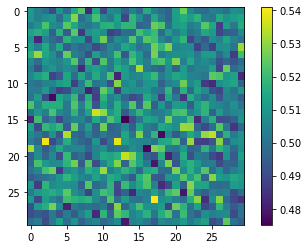

In [40]:
x = tf.random.normal([1,256,256,3])
y = tf.random.uniform([1,256,256,3])

disc_out = Discriminator()(x, y)
plt.imshow(disc_out[0, ... ,0])
plt.colorbar()

## 17-12. 난 스케치를 할 테니 너는 채색을 하거라 (5) 학습 및 테스트하기

손실 함수 선택에 따른 결과의 차이

![](https://d3s0tskafalll9.cloudfront.net/media/images/p2p_result_loss2.max-800x600.png)

일반적인 GAN의 손실 함수에 L1을 추가로 이용했을 때 결과가 좋음

In [41]:
from tensorflow.keras import losses

bce = losses.BinaryCrossentropy(from_logits=False)

# bce = losses.BinaryCrossentropy(from_logits=True)

mae = losses.MeanAbsoluteError()

def get_gene_loss(fake_output, real_output, fake_disc):
    l1_loss = mae(real_output, fake_output)
    gene_loss = bce(tf.ones_like(fake_disc), fake_disc)
    return gene_loss, l1_loss

def get_disc_loss(fake_disc, real_disc):
    return bce(tf.zeros_like(fake_disc), fake_disc) + bce(tf.ones_like(real_disc), real_disc)

print("✅")

✅


In [42]:
# from tensorflow.python.ops.losses import losses
# from tensorflow.python.framework import ops
# from tensorflow.python.ops import array_ops

# def generator_loss(fake_output):
# #     return cross_entropy(tf.ones_like(fake_output), fake_output)
#     label_smoothing=0.0
#     weights=1.0
#     scope=None
#     loss_collection=ops.GraphKeys.LOSSES
#     reduction=losses.Reduction.SUM_BY_NONZERO_WEIGHTS

#     loss = losses.sigmoid_cross_entropy(
#         array_ops.ones_like(fake_output),
#         fake_output, weights, label_smoothing, scope,
#         loss_collection, reduction)
    
#     return loss


# def discriminator_loss(real_output, fake_output):
# # def discriminator_loss(real_output, fake_output, weights): ###
    
    
# #     real_weights      = weights['real'][-1]          ###
# #     generated_weights = weights['generated'][-1]     ###
#     real_weights      = 1.2
#     generated_weights = 1.0
#     label_smoothing=0.25
#     loss_collection=ops.GraphKeys.LOSSES
#     reduction=losses.Reduction.SUM_BY_NONZERO_WEIGHTS
#     add_summaries=False

#     # -log((1 - label_smoothing) - sigmoid(D(x)))
#     loss_on_real = losses.sigmoid_cross_entropy(
#         array_ops.ones_like(real_output),
#         real_output, real_weights, label_smoothing,
#         reduction=reduction)
#     # -log(- sigmoid(D(G(x))))
#     loss_on_generated = losses.sigmoid_cross_entropy(
#         array_ops.zeros_like(fake_output),
#         fake_output, generated_weights,
#         reduction=reduction)

#     loss = loss_on_real + loss_on_generated
#     return loss

In [43]:
# def generator_loss(disc_generated_output, gen_output, target):
#     gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)
#     # mean absolute error
#     l1_loss = tf.reduce_mean(tf.abs(target - gen_output))
#     total_gen_loss = gan_loss + (LAMBDA * l1_loss)
#     return total_gen_loss, gan_loss, l1_loss


# def discriminator_loss(disc_real_output, disc_generated_output):
#     real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)
#     generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)
#     total_disc_loss = real_loss + generated_loss
#     return total_disc_loss

Generator의 손실 함수 (위 코드의 get_gene_loss)는 총 3개의 입력이 있습니다. 이 중 fake_disc는 Generator가 생성한 가짜 이미지를 Discriminator에 입력하여 얻어진 값이며, 실제 이미지를 뜻하는 "1"과 비교하기 위해 tf.ones_like()를 사용합니다. 또한 L1 손실을 계산하기 위해 생성한 가짜 이미지(fake_output)와 실제 이미지(real_output) 사이의 MAE(Mean Absolute Error)를 계산합니다.

Discriminator의 손실 함수 (위 코드의 get_disc_loss)는 2개의 입력이 있으며, 이들은 가짜 및 진짜 이미지가 Discriminator에 각각 입력되어 얻어진 값입니다. Discriminator는 실제 이미지를 잘 구분해 내야 하므로 real_disc는 "1"로 채워진 벡터와 비교하고, fake_disc는 "0"으로 채워진 벡터와 비교합니다.

In [44]:
from tensorflow.keras import optimizers

gene_opt = optimizers.Adam(5e-4, beta_1=.5, beta_2=.999)
disc_opt = optimizers.Adam(2e-4, beta_1=.5, beta_2=.999)

print("✅")

✅


In [45]:
@tf.function
def train_step(sketch, real_colored):
    with tf.GradientTape() as gene_tape, tf.GradientTape() as disc_tape:
        # Generator 예측
        fake_colored = generator(sketch, training=True)
        # Discriminator 예측
        fake_disc = discriminator(sketch, fake_colored, training=True)
        real_disc = discriminator(sketch, real_colored, training=True)
        # Generator 손실 계산
        gene_loss, l1_loss = get_gene_loss(fake_colored, real_colored, fake_disc)
        gene_total_loss = gene_loss + (100 * l1_loss) ## <===== L1 손실 반영 λ=100
        # Discrminator 손실 계산
        disc_loss = get_disc_loss(fake_disc, real_disc)
                
    gene_gradient = gene_tape.gradient(gene_total_loss, generator.trainable_variables)
    disc_gradient = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    
    gene_opt.apply_gradients(zip(gene_gradient, generator.trainable_variables))
    disc_opt.apply_gradients(zip(disc_gradient, discriminator.trainable_variables))
    return gene_loss, l1_loss, disc_loss

print("✅")

✅


논문에서는 Generator의 손실을 아래와 같이 정의했습니다.

$$G^* = \arg \min_G \max_D \mathcal{L}_{cGAN}(G,D) + \lambda \mathcal{L}_{L1}(G)$$

λλ는 학습 과정에서 L1 손실을 얼마나 반영할 것인지를 나타내며 논문에서는 λ=100λ=100을 사용

In [46]:
# EPOCHS = 1

# generator = UNetGenerator()
# discriminator = Discriminator()

# for epoch in range(1, EPOCHS+1):
#     for i, (sketch, colored) in enumerate(train_images):
#         g_loss, l1_loss, d_loss = train_step(sketch, colored)
                
#         # 10회 반복마다 손실을 출력합니다.
#         if (i+1) % 10 == 0:
#             print(f"EPOCH[{epoch}] - STEP[{i+1}] \
#                     \nGenerator_loss:{g_loss.numpy():.4f} \
#                     \nL1_loss:{l1_loss.numpy():.4f} \
#                     \nDiscriminator_loss:{d_loss.numpy():.4f}", end="\n\n")

In [47]:
# test_ind = 1

# f = data_path + os.listdir(data_path)[test_ind]
# sketch, colored = load_img(f)

# pred = generator(tf.expand_dims(sketch, 0))
# pred = denormalize(pred)

# plt.figure(figsize=(20,10))
# plt.subplot(1,3,1); plt.imshow(denormalize(sketch))
# plt.subplot(1,3,2); plt.imshow(pred[0])
# plt.subplot(1,3,3); plt.imshow(denormalize(colored))

 이렇게 Encoder-Decoder Generator, U-Net Generator, Discriminator의 구현했음.

## 17-13. 프로젝트 : Segmentation map으로 도로 이미지 만들기

도로의 레이블 정보를 활용해 이미지를 생성

![](https://d3s0tskafalll9.cloudfront.net/media/images/p2p_result_seg.max-800x600.png)

https://d3s0tskafalll9.cloudfront.net/media/documents/cityscapes.zip

1000개의 학습용 이미지 및 5개의 평가 이미지를 포함

Tensroflow에서 제공하는 Pix2Pix 튜토리얼은 위 이미지와 비슷한 레이블 정보 이미지를 사용하기 때문에 좋은 참고 자료가 될 수 있을 것 같습니다.

https://www.tensorflow.org/tutorials/generative/pix2pix?hl=ko

In [48]:
import numpy
import tensorflow

print(numpy.__version__)
print(tensorflow.__version__)

1.22.2
2.8.0


# 프로젝트 수행

데이터에 한 가지 이상의 augmentation 방법을 적용하여 학습해 주세요.
(어떠한 방법을 사용했는지 적어주세요.)  
이전에 구현했던 두 개의 Generator 중 Encoder와 Decoder간에 skip connection이 있는 U-Net Generator를 사용해 주세요.  
모델 학습 후, 학습된 Generator를 이용해 테스트합니다. 테스트 데이터는 다운로드했던 "val" 폴더 내 이미지를 사용해 주세요.  
1개 이상의 이미지에 대해 테스트 과정을 거친 후 그 결과를 스케치, 생성된 사진, 실제 사진 순서로 나란히 시각화해 주세요.  
모델을 충분히 학습하기에 시간이 부족할 수 있습니다. 적어도 10 epoch 이상 학습하며 중간 손실 값에 대한 로그를 남겨주세요. 좋은 결과를 얻기 위해선 긴 학습 시간이 필요하므로 테스트 결과는 만족스럽지 않아도 괜찮습니다.

## (1) 데이터 준비하기

In [49]:
import os

# data_path = Path.joinpath(Path.cwd(),''cityscapes','train')
data_path = 'cityscapes\\train\\'

print(data_path)

print("number of train examples :", len(os.listdir(data_path)))

cityscapes\train\
number of train examples : 1000


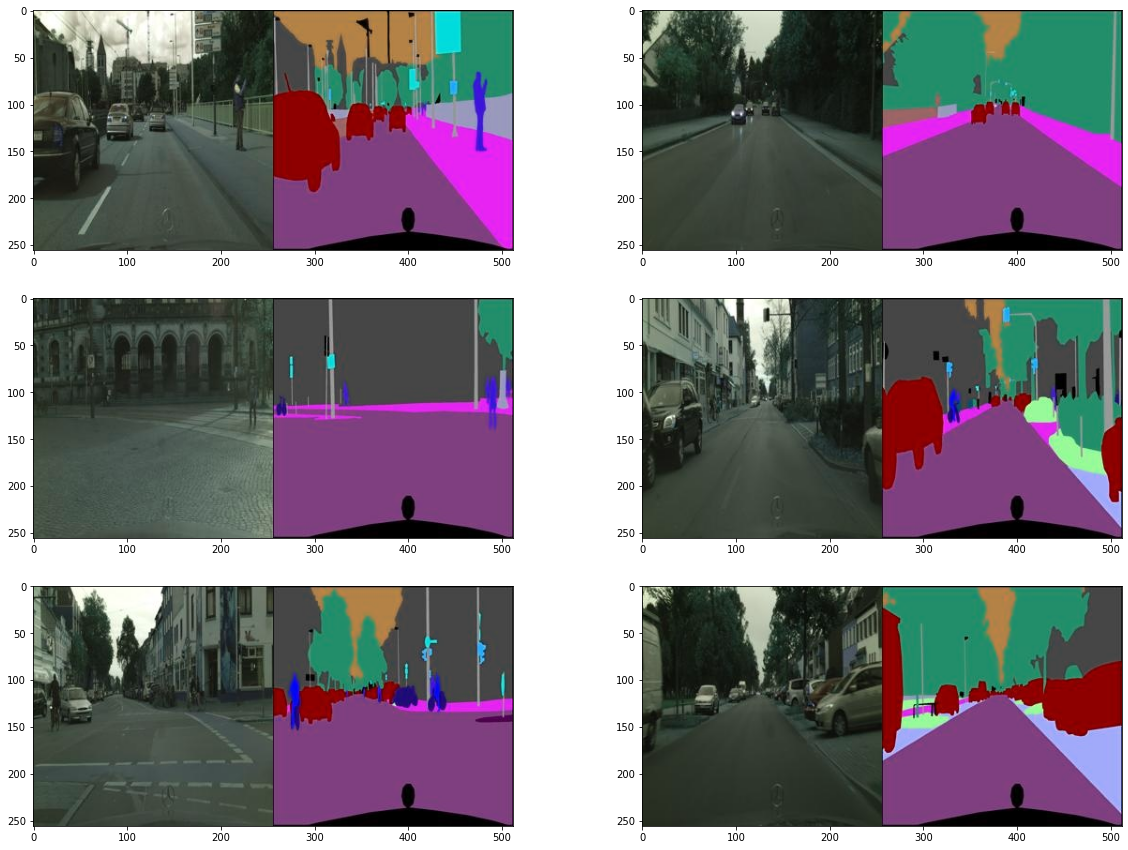

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
for i in range(1, 7):
    f = data_path + os.listdir(data_path)[np.random.randint(1000)]
    img = cv2.imread(f, cv2.IMREAD_COLOR)
    plt.subplot(3,2,i)
    plt.imshow(img)

두 번째 그림을 Pix2Pix 모델에 입력하여 첫 번째 스케치와 같은 채색된 이미지를 생성하는 것이 이번 단계의 목표

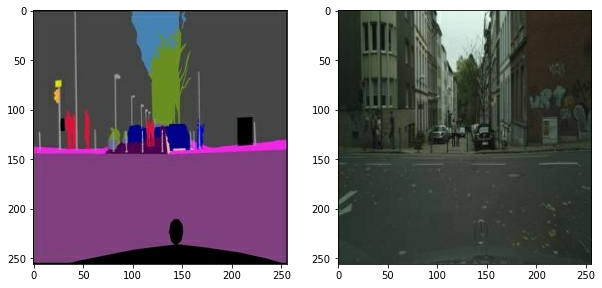

In [51]:
import tensorflow as tf

def normalize(x):
    x = tf.cast(x, tf.float32)
    return (x/127.5) - 1

def denormalize(x):
    x = (x+1)*127.5
    x = x.numpy()
    return x.astype(np.uint8)

def load_img(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, 3)
    
    w = tf.shape(img)[1] // 2
#     sketch = img[:, :w, :] 
#     sketch = tf.cast(sketch, tf.float32)
#     colored = img[:, w:, :] 
#     colored = tf.cast(colored, tf.float32)
    colored = img[:, :w, :] 
    colored = tf.cast(colored, tf.float32)
    sketch  = img[:, w:, :] 
    sketch  = tf.cast(sketch, tf.float32)

    return normalize(sketch), normalize(colored)

f = data_path + os.listdir(data_path)[1]

sketch, colored = load_img(f)

plt.figure(figsize=(10,7))
plt.subplot(1,2,1); plt.imshow(denormalize(sketch))
plt.subplot(1,2,2); plt.imshow(denormalize(colored))

In [52]:
from tensorflow import image
from tensorflow.keras.preprocessing.image import random_rotation

@tf.function() # 빠른 텐서플로 연산을 위해 @tf.function()을 사용합니다. 
def apply_augmentation2(sketch, colored):
    stacked = tf.concat([sketch, colored], axis=-1)
    
    _pad = tf.constant([[30,30],[30,30],[0,0]])
    if tf.random.uniform(()) < .5:
        padded = tf.pad(stacked, _pad, "REFLECT")
    else:
        padded = tf.pad(stacked, _pad, "CONSTANT", constant_values=1.)

    out = image.random_crop(padded, size=[256, 256, 6])
    
    out = image.random_flip_left_right(out)
#     out = image.random_flip_up_down(out)
    
#     if tf.random.uniform(()) < .5:
#         degree = tf.random.uniform([], minval=1, maxval=4, dtype=tf.int32)
#         out = image.rot90(out, k=degree)
    
    return out[...,:3], out[...,3:]   

print("✅")

✅


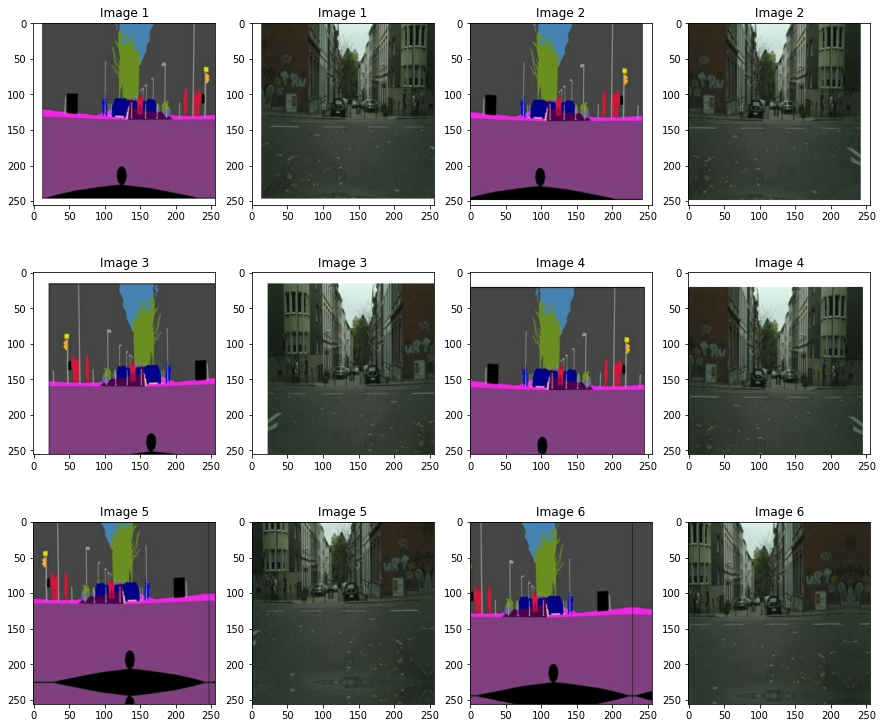

In [53]:
plt.figure(figsize=(15,13))
img_n = 1
for i in range(1, 13, 2):
    augmented_sketch, augmented_colored = apply_augmentation2(sketch, colored)
    
    plt.subplot(3,4,i)
    plt.imshow(denormalize(augmented_sketch)); plt.title(f"Image {img_n}")
    plt.subplot(3,4,i+1); 
    plt.imshow(denormalize(augmented_colored)); plt.title(f"Image {img_n}")
    img_n += 1

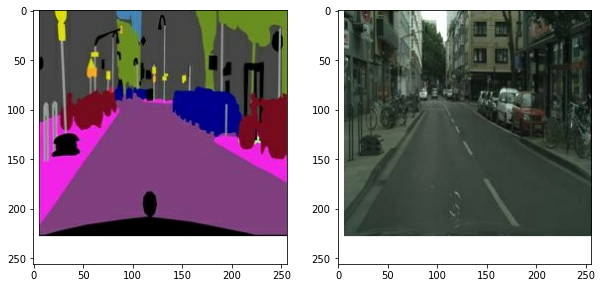

In [54]:
from tensorflow import data

def get_train2(img_path):
    sketch, colored = load_img(img_path)
    sketch, colored = apply_augmentation2(sketch, colored)
    return sketch, colored

train_images = data.Dataset.list_files(data_path + "*.jpg")
train_images = train_images.map(get_train2).shuffle(100).batch(8)

sample = train_images.take(1)
sample = list(sample.as_numpy_iterator())
sketch, colored = (sample[0][0]+1)*127.5, (sample[0][1]+1)*127.5

plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(sketch[0].astype(np.uint8))
plt.subplot(1,2,2); plt.imshow(colored[0].astype(np.uint8))

## (2) Generator 구성하기

#### Generator 구현하기

In [55]:
Encoder().get_summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 encode_block (EncodeBlock)  (None, 128, 128, 64)      3072      
                                                                 
 encode_block_1 (EncodeBlock  (None, 64, 64, 128)      131584    
 )                                                               
                                                                 
 encode_block_2 (EncodeBlock  (None, 32, 32, 256)      525312    
 )                                                               
                                                                 
 encode_block_3 (EncodeBlock  (None, 16, 16, 512)      2099200   
 )                                                               
                                                             

In [56]:
Decoder().get_summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1, 1, 512)]       0         
                                                                 
 decode_block (DecodeBlock)  (None, 2, 2, 512)         4196352   
                                                                 
 decode_block_1 (DecodeBlock  (None, 4, 4, 512)        4196352   
 )                                                               
                                                                 
 decode_block_2 (DecodeBlock  (None, 8, 8, 512)        4196352   
 )                                                               
                                                                 
 decode_block_3 (DecodeBlock  (None, 16, 16, 512)      4196352   
 )                                                               
                                                           

In [57]:
EncoderDecoderGenerator().get_summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 encoder_1 (Encoder)         (None, 1, 1, 512)         19544576  
                                                                 
 decoder_1 (Decoder)         (None, 256, 256, 3)       19542784  
                                                                 
Total params: 39,087,360
Trainable params: 39,076,480
Non-trainable params: 10,880
_________________________________________________________________


## (3) Generator 재구성하기

In [58]:
# inputs = Input((256,256,32))
# out = layers.ZeroPadding2D()(inputs)
# out = layers.Conv2D(64, 4, 1, "valid", use_bias=False)(out)

inputs = Input((128,128,32))
out = layers.ZeroPadding2D()(inputs)
out = layers.Conv2D(64, 4, 1, "valid", use_bias=False)(out)
out = layers.Conv2D(128, 4, 1, "valid", use_bias=False)(out)
out = layers.BatchNormalization()(out)
out = layers.LeakyReLU(0.2)(out)

Model(inputs, out).summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 128, 128, 32)]    0         
                                                                 
 zero_padding2d_3 (ZeroPaddi  (None, 130, 130, 32)     0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 127, 127, 64)      32768     
                                                                 
 conv2d_23 (Conv2D)          (None, 124, 124, 128)     131072    
                                                                 
 batch_normalization_34 (Bat  (None, 124, 124, 128)    512       
 chNormalization)                                                
                                                                 
 leaky_re_lu_21 (LeakyReLU)  (None, 124, 124, 128)     0   

In [59]:
Discriminator().get_summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_7 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 concatenate_1 (Concatenate)    (None, 256, 256, 6)  0           ['input_6[0][0]',                
                                                                  'input_7[0][0]']          

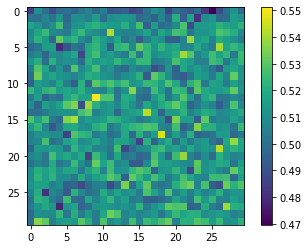

In [60]:
x = tf.random.normal([1,256,256,3])
y = tf.random.uniform([1,256,256,3])

disc_out = Discriminator()(x, y)
plt.imshow(disc_out[0, ... ,0])
plt.colorbar()

In [61]:
from tensorflow.keras import optimizers

gene_opt = optimizers.Adam(2.5e-4, beta_1=.5, beta_2=.999)
disc_opt = optimizers.Adam(1e-4, beta_1=.5, beta_2=.999)

print("✅")

✅


In [62]:
generator = UNetGenerator()

In [63]:
discriminator = Discriminator()

In [64]:
EPOCHS = 150

for epoch in range(1, EPOCHS+1):
    for i, (sketch, colored) in enumerate(train_images):
        g_loss, l1_loss, d_loss = train_step(sketch, colored)
                
        # 10회 반복마다 손실을 출력합니다.
        if (i+1) % 10 == 0:
            print(f"EPOCH[{epoch}] - STEP[{i+1}] \
                    \nGenerator_loss:{g_loss.numpy():.4f} \
                    \nL1_loss:{l1_loss.numpy():.4f} \
                    \nDiscriminator_loss:{d_loss.numpy():.4f}", end="\n\n")

EPOCH[1] - STEP[10]                     
Generator_loss:0.8535                     
L1_loss:0.2767                     
Discriminator_loss:1.3168

EPOCH[1] - STEP[20]                     
Generator_loss:0.8138                     
L1_loss:0.2010                     
Discriminator_loss:1.3924

EPOCH[1] - STEP[30]                     
Generator_loss:0.8940                     
L1_loss:0.1818                     
Discriminator_loss:1.2101

EPOCH[1] - STEP[40]                     
Generator_loss:0.8861                     
L1_loss:0.1601                     
Discriminator_loss:1.2184

EPOCH[1] - STEP[50]                     
Generator_loss:0.9990                     
L1_loss:0.1787                     
Discriminator_loss:1.1039

EPOCH[1] - STEP[60]                     
Generator_loss:0.8796                     
L1_loss:0.1605                     
Discriminator_loss:1.3033

EPOCH[1] - STEP[70]                     
Generator_loss:0.9229                     
L1_loss:0.1733                    

EPOCH[5] - STEP[90]                     
Generator_loss:2.3959                     
L1_loss:0.1490                     
Discriminator_loss:1.0421

EPOCH[5] - STEP[100]                     
Generator_loss:2.0046                     
L1_loss:0.1374                     
Discriminator_loss:0.8895

EPOCH[5] - STEP[110]                     
Generator_loss:2.7069                     
L1_loss:0.1505                     
Discriminator_loss:0.9352

EPOCH[5] - STEP[120]                     
Generator_loss:1.8792                     
L1_loss:0.1399                     
Discriminator_loss:0.9564

EPOCH[6] - STEP[10]                     
Generator_loss:2.2692                     
L1_loss:0.1677                     
Discriminator_loss:0.4690

EPOCH[6] - STEP[20]                     
Generator_loss:0.5473                     
L1_loss:0.1875                     
Discriminator_loss:1.2135

EPOCH[6] - STEP[30]                     
Generator_loss:1.0623                     
L1_loss:0.1803                 

EPOCH[10] - STEP[50]                     
Generator_loss:0.5524                     
L1_loss:0.1715                     
Discriminator_loss:1.5444

EPOCH[10] - STEP[60]                     
Generator_loss:2.4885                     
L1_loss:0.1751                     
Discriminator_loss:0.5495

EPOCH[10] - STEP[70]                     
Generator_loss:1.0652                     
L1_loss:0.1897                     
Discriminator_loss:0.7611

EPOCH[10] - STEP[80]                     
Generator_loss:2.6570                     
L1_loss:0.1573                     
Discriminator_loss:0.8049

EPOCH[10] - STEP[90]                     
Generator_loss:0.4471                     
L1_loss:0.1692                     
Discriminator_loss:1.5072

EPOCH[10] - STEP[100]                     
Generator_loss:0.7698                     
L1_loss:0.1582                     
Discriminator_loss:0.9576

EPOCH[10] - STEP[110]                     
Generator_loss:1.2494                     
L1_loss:0.1756           

EPOCH[15] - STEP[10]                     
Generator_loss:1.2824                     
L1_loss:0.2110                     
Discriminator_loss:0.6256

EPOCH[15] - STEP[20]                     
Generator_loss:2.0111                     
L1_loss:0.1783                     
Discriminator_loss:0.2565

EPOCH[15] - STEP[30]                     
Generator_loss:2.2269                     
L1_loss:0.1850                     
Discriminator_loss:1.1839

EPOCH[15] - STEP[40]                     
Generator_loss:0.6723                     
L1_loss:0.1709                     
Discriminator_loss:1.4066

EPOCH[15] - STEP[50]                     
Generator_loss:0.7042                     
L1_loss:0.1799                     
Discriminator_loss:1.2390

EPOCH[15] - STEP[60]                     
Generator_loss:1.0758                     
L1_loss:0.1614                     
Discriminator_loss:0.8011

EPOCH[15] - STEP[70]                     
Generator_loss:1.3569                     
L1_loss:0.1757             

EPOCH[19] - STEP[90]                     
Generator_loss:0.9035                     
L1_loss:0.1558                     
Discriminator_loss:0.9229

EPOCH[19] - STEP[100]                     
Generator_loss:0.9293                     
L1_loss:0.1840                     
Discriminator_loss:0.6244

EPOCH[19] - STEP[110]                     
Generator_loss:0.9966                     
L1_loss:0.1760                     
Discriminator_loss:0.9721

EPOCH[19] - STEP[120]                     
Generator_loss:1.2440                     
L1_loss:0.1810                     
Discriminator_loss:0.7684

EPOCH[20] - STEP[10]                     
Generator_loss:1.0983                     
L1_loss:0.1634                     
Discriminator_loss:1.2416

EPOCH[20] - STEP[20]                     
Generator_loss:1.5191                     
L1_loss:0.1718                     
Discriminator_loss:0.5969

EPOCH[20] - STEP[30]                     
Generator_loss:1.2186                     
L1_loss:0.1944          

EPOCH[24] - STEP[50]                     
Generator_loss:1.0784                     
L1_loss:0.1832                     
Discriminator_loss:1.0171

EPOCH[24] - STEP[60]                     
Generator_loss:2.5510                     
L1_loss:0.1676                     
Discriminator_loss:0.3254

EPOCH[24] - STEP[70]                     
Generator_loss:1.0606                     
L1_loss:0.1768                     
Discriminator_loss:0.7702

EPOCH[24] - STEP[80]                     
Generator_loss:1.3936                     
L1_loss:0.1667                     
Discriminator_loss:1.5277

EPOCH[24] - STEP[90]                     
Generator_loss:2.1487                     
L1_loss:0.1471                     
Discriminator_loss:1.9556

EPOCH[24] - STEP[100]                     
Generator_loss:1.5412                     
L1_loss:0.1556                     
Discriminator_loss:1.4365

EPOCH[24] - STEP[110]                     
Generator_loss:1.3855                     
L1_loss:0.1744           

EPOCH[29] - STEP[10]                     
Generator_loss:0.6618                     
L1_loss:0.1886                     
Discriminator_loss:0.8480

EPOCH[29] - STEP[20]                     
Generator_loss:1.3095                     
L1_loss:0.1784                     
Discriminator_loss:0.7443

EPOCH[29] - STEP[30]                     
Generator_loss:1.9283                     
L1_loss:0.1682                     
Discriminator_loss:0.9747

EPOCH[29] - STEP[40]                     
Generator_loss:1.0790                     
L1_loss:0.1548                     
Discriminator_loss:1.5582

EPOCH[29] - STEP[50]                     
Generator_loss:1.2496                     
L1_loss:0.1812                     
Discriminator_loss:0.5790

EPOCH[29] - STEP[60]                     
Generator_loss:0.7999                     
L1_loss:0.1843                     
Discriminator_loss:0.7043

EPOCH[29] - STEP[70]                     
Generator_loss:1.9366                     
L1_loss:0.1457             

EPOCH[33] - STEP[90]                     
Generator_loss:1.2492                     
L1_loss:0.1824                     
Discriminator_loss:0.7480

EPOCH[33] - STEP[100]                     
Generator_loss:2.3045                     
L1_loss:0.1536                     
Discriminator_loss:1.0413

EPOCH[33] - STEP[110]                     
Generator_loss:0.9498                     
L1_loss:0.1608                     
Discriminator_loss:2.4196

EPOCH[33] - STEP[120]                     
Generator_loss:1.2184                     
L1_loss:0.1737                     
Discriminator_loss:1.2789

EPOCH[34] - STEP[10]                     
Generator_loss:2.3416                     
L1_loss:0.1869                     
Discriminator_loss:0.8235

EPOCH[34] - STEP[20]                     
Generator_loss:1.2633                     
L1_loss:0.1515                     
Discriminator_loss:0.7782

EPOCH[34] - STEP[30]                     
Generator_loss:1.0432                     
L1_loss:0.1664          

EPOCH[38] - STEP[50]                     
Generator_loss:0.9874                     
L1_loss:0.1680                     
Discriminator_loss:1.0664

EPOCH[38] - STEP[60]                     
Generator_loss:0.5422                     
L1_loss:0.1873                     
Discriminator_loss:1.2114

EPOCH[38] - STEP[70]                     
Generator_loss:0.6233                     
L1_loss:0.1663                     
Discriminator_loss:1.1114

EPOCH[38] - STEP[80]                     
Generator_loss:1.8635                     
L1_loss:0.1405                     
Discriminator_loss:1.2189

EPOCH[38] - STEP[90]                     
Generator_loss:1.4170                     
L1_loss:0.1804                     
Discriminator_loss:0.5228

EPOCH[38] - STEP[100]                     
Generator_loss:0.7088                     
L1_loss:0.1886                     
Discriminator_loss:0.8276

EPOCH[38] - STEP[110]                     
Generator_loss:1.9908                     
L1_loss:0.1506           

EPOCH[43] - STEP[10]                     
Generator_loss:1.1977                     
L1_loss:0.1526                     
Discriminator_loss:1.3078

EPOCH[43] - STEP[20]                     
Generator_loss:1.8268                     
L1_loss:0.1758                     
Discriminator_loss:0.7245

EPOCH[43] - STEP[30]                     
Generator_loss:1.1209                     
L1_loss:0.1576                     
Discriminator_loss:0.8805

EPOCH[43] - STEP[40]                     
Generator_loss:1.6934                     
L1_loss:0.1680                     
Discriminator_loss:0.7066

EPOCH[43] - STEP[50]                     
Generator_loss:0.7189                     
L1_loss:0.1590                     
Discriminator_loss:1.0730

EPOCH[43] - STEP[60]                     
Generator_loss:0.9875                     
L1_loss:0.1570                     
Discriminator_loss:0.9976

EPOCH[43] - STEP[70]                     
Generator_loss:1.5109                     
L1_loss:0.1700             

EPOCH[47] - STEP[90]                     
Generator_loss:1.8423                     
L1_loss:0.1616                     
Discriminator_loss:0.9047

EPOCH[47] - STEP[100]                     
Generator_loss:1.7963                     
L1_loss:0.1745                     
Discriminator_loss:0.6126

EPOCH[47] - STEP[110]                     
Generator_loss:1.2491                     
L1_loss:0.1700                     
Discriminator_loss:0.5734

EPOCH[47] - STEP[120]                     
Generator_loss:1.2482                     
L1_loss:0.1917                     
Discriminator_loss:0.5708

EPOCH[48] - STEP[10]                     
Generator_loss:1.0622                     
L1_loss:0.1846                     
Discriminator_loss:0.9290

EPOCH[48] - STEP[20]                     
Generator_loss:1.4460                     
L1_loss:0.1728                     
Discriminator_loss:1.0728

EPOCH[48] - STEP[30]                     
Generator_loss:1.5259                     
L1_loss:0.1461          

EPOCH[52] - STEP[50]                     
Generator_loss:2.2486                     
L1_loss:0.1819                     
Discriminator_loss:0.4605

EPOCH[52] - STEP[60]                     
Generator_loss:2.1747                     
L1_loss:0.1488                     
Discriminator_loss:1.8753

EPOCH[52] - STEP[70]                     
Generator_loss:1.7777                     
L1_loss:0.1639                     
Discriminator_loss:0.3189

EPOCH[52] - STEP[80]                     
Generator_loss:0.9752                     
L1_loss:0.1814                     
Discriminator_loss:1.0639

EPOCH[52] - STEP[90]                     
Generator_loss:0.9623                     
L1_loss:0.1755                     
Discriminator_loss:0.6674

EPOCH[52] - STEP[100]                     
Generator_loss:1.5649                     
L1_loss:0.1510                     
Discriminator_loss:2.0334

EPOCH[52] - STEP[110]                     
Generator_loss:0.9412                     
L1_loss:0.1580           

EPOCH[57] - STEP[10]                     
Generator_loss:1.1549                     
L1_loss:0.2080                     
Discriminator_loss:0.4461

EPOCH[57] - STEP[20]                     
Generator_loss:1.3041                     
L1_loss:0.1478                     
Discriminator_loss:1.2017

EPOCH[57] - STEP[30]                     
Generator_loss:2.0124                     
L1_loss:0.1535                     
Discriminator_loss:0.3603

EPOCH[57] - STEP[40]                     
Generator_loss:1.9166                     
L1_loss:0.2085                     
Discriminator_loss:0.2042

EPOCH[57] - STEP[50]                     
Generator_loss:2.0667                     
L1_loss:0.1518                     
Discriminator_loss:0.4522

EPOCH[57] - STEP[60]                     
Generator_loss:0.8517                     
L1_loss:0.1763                     
Discriminator_loss:1.1436

EPOCH[57] - STEP[70]                     
Generator_loss:0.9040                     
L1_loss:0.1632             

EPOCH[61] - STEP[90]                     
Generator_loss:0.9882                     
L1_loss:0.1650                     
Discriminator_loss:2.1866

EPOCH[61] - STEP[100]                     
Generator_loss:0.8328                     
L1_loss:0.1546                     
Discriminator_loss:0.8697

EPOCH[61] - STEP[110]                     
Generator_loss:1.6015                     
L1_loss:0.2051                     
Discriminator_loss:0.2731

EPOCH[61] - STEP[120]                     
Generator_loss:2.5438                     
L1_loss:0.1535                     
Discriminator_loss:0.8644

EPOCH[62] - STEP[10]                     
Generator_loss:1.6149                     
L1_loss:0.1707                     
Discriminator_loss:1.1033

EPOCH[62] - STEP[20]                     
Generator_loss:1.9599                     
L1_loss:0.1602                     
Discriminator_loss:1.0963

EPOCH[62] - STEP[30]                     
Generator_loss:1.2009                     
L1_loss:0.1746          

EPOCH[66] - STEP[50]                     
Generator_loss:1.2472                     
L1_loss:0.1902                     
Discriminator_loss:0.4969

EPOCH[66] - STEP[60]                     
Generator_loss:0.7443                     
L1_loss:0.1591                     
Discriminator_loss:0.9449

EPOCH[66] - STEP[70]                     
Generator_loss:1.0603                     
L1_loss:0.1705                     
Discriminator_loss:0.5832

EPOCH[66] - STEP[80]                     
Generator_loss:0.7103                     
L1_loss:0.1331                     
Discriminator_loss:1.0721

EPOCH[66] - STEP[90]                     
Generator_loss:0.7496                     
L1_loss:0.1674                     
Discriminator_loss:1.2916

EPOCH[66] - STEP[100]                     
Generator_loss:1.3463                     
L1_loss:0.1642                     
Discriminator_loss:0.9132

EPOCH[66] - STEP[110]                     
Generator_loss:0.8190                     
L1_loss:0.1546           

EPOCH[71] - STEP[10]                     
Generator_loss:1.9886                     
L1_loss:0.1588                     
Discriminator_loss:0.5793

EPOCH[71] - STEP[20]                     
Generator_loss:1.7266                     
L1_loss:0.1639                     
Discriminator_loss:0.6379

EPOCH[71] - STEP[30]                     
Generator_loss:1.8165                     
L1_loss:0.1535                     
Discriminator_loss:0.5888

EPOCH[71] - STEP[40]                     
Generator_loss:0.6129                     
L1_loss:0.1775                     
Discriminator_loss:2.2014

EPOCH[71] - STEP[50]                     
Generator_loss:0.6403                     
L1_loss:0.1549                     
Discriminator_loss:1.3710

EPOCH[71] - STEP[60]                     
Generator_loss:1.4889                     
L1_loss:0.1537                     
Discriminator_loss:1.0307

EPOCH[71] - STEP[70]                     
Generator_loss:0.8304                     
L1_loss:0.1536             

EPOCH[75] - STEP[90]                     
Generator_loss:1.6643                     
L1_loss:0.1575                     
Discriminator_loss:0.6355

EPOCH[75] - STEP[100]                     
Generator_loss:1.4117                     
L1_loss:0.1722                     
Discriminator_loss:0.7429

EPOCH[75] - STEP[110]                     
Generator_loss:0.7080                     
L1_loss:0.1909                     
Discriminator_loss:1.0757

EPOCH[75] - STEP[120]                     
Generator_loss:0.9106                     
L1_loss:0.1495                     
Discriminator_loss:1.1786

EPOCH[76] - STEP[10]                     
Generator_loss:1.3769                     
L1_loss:0.1752                     
Discriminator_loss:0.4278

EPOCH[76] - STEP[20]                     
Generator_loss:1.2029                     
L1_loss:0.1594                     
Discriminator_loss:0.8389

EPOCH[76] - STEP[30]                     
Generator_loss:0.9923                     
L1_loss:0.1505          

EPOCH[80] - STEP[50]                     
Generator_loss:1.4489                     
L1_loss:0.1600                     
Discriminator_loss:0.6573

EPOCH[80] - STEP[60]                     
Generator_loss:0.6708                     
L1_loss:0.1863                     
Discriminator_loss:1.0074

EPOCH[80] - STEP[70]                     
Generator_loss:0.9743                     
L1_loss:0.1649                     
Discriminator_loss:0.9321

EPOCH[80] - STEP[80]                     
Generator_loss:1.6045                     
L1_loss:0.1566                     
Discriminator_loss:2.0239

EPOCH[80] - STEP[90]                     
Generator_loss:1.6701                     
L1_loss:0.1496                     
Discriminator_loss:0.8461

EPOCH[80] - STEP[100]                     
Generator_loss:1.6461                     
L1_loss:0.1675                     
Discriminator_loss:0.3553

EPOCH[80] - STEP[110]                     
Generator_loss:1.5507                     
L1_loss:0.1698           

EPOCH[85] - STEP[10]                     
Generator_loss:0.7020                     
L1_loss:0.1617                     
Discriminator_loss:1.0559

EPOCH[85] - STEP[20]                     
Generator_loss:1.4472                     
L1_loss:0.1466                     
Discriminator_loss:0.6113

EPOCH[85] - STEP[30]                     
Generator_loss:1.0277                     
L1_loss:0.1682                     
Discriminator_loss:0.5666

EPOCH[85] - STEP[40]                     
Generator_loss:1.2346                     
L1_loss:0.1565                     
Discriminator_loss:1.0524

EPOCH[85] - STEP[50]                     
Generator_loss:1.7466                     
L1_loss:0.1670                     
Discriminator_loss:0.4458

EPOCH[85] - STEP[60]                     
Generator_loss:1.1981                     
L1_loss:0.1567                     
Discriminator_loss:1.1645

EPOCH[85] - STEP[70]                     
Generator_loss:1.4319                     
L1_loss:0.1619             

EPOCH[89] - STEP[90]                     
Generator_loss:1.1196                     
L1_loss:0.1774                     
Discriminator_loss:0.8391

EPOCH[89] - STEP[100]                     
Generator_loss:1.3672                     
L1_loss:0.1758                     
Discriminator_loss:0.5634

EPOCH[89] - STEP[110]                     
Generator_loss:1.5481                     
L1_loss:0.1665                     
Discriminator_loss:0.4380

EPOCH[89] - STEP[120]                     
Generator_loss:1.3103                     
L1_loss:0.1416                     
Discriminator_loss:1.0294

EPOCH[90] - STEP[10]                     
Generator_loss:1.4922                     
L1_loss:0.1579                     
Discriminator_loss:0.6239

EPOCH[90] - STEP[20]                     
Generator_loss:1.4539                     
L1_loss:0.1346                     
Discriminator_loss:2.0061

EPOCH[90] - STEP[30]                     
Generator_loss:1.2272                     
L1_loss:0.1649          

EPOCH[94] - STEP[50]                     
Generator_loss:1.0937                     
L1_loss:0.1539                     
Discriminator_loss:0.9259

EPOCH[94] - STEP[60]                     
Generator_loss:0.7831                     
L1_loss:0.1710                     
Discriminator_loss:0.7919

EPOCH[94] - STEP[70]                     
Generator_loss:0.5039                     
L1_loss:0.1850                     
Discriminator_loss:1.0861

EPOCH[94] - STEP[80]                     
Generator_loss:0.7515                     
L1_loss:0.1435                     
Discriminator_loss:1.5769

EPOCH[94] - STEP[90]                     
Generator_loss:1.0064                     
L1_loss:0.1559                     
Discriminator_loss:1.6427

EPOCH[94] - STEP[100]                     
Generator_loss:0.6719                     
L1_loss:0.1627                     
Discriminator_loss:1.0070

EPOCH[94] - STEP[110]                     
Generator_loss:1.0119                     
L1_loss:0.1445           

EPOCH[99] - STEP[10]                     
Generator_loss:0.9993                     
L1_loss:0.1574                     
Discriminator_loss:0.9131

EPOCH[99] - STEP[20]                     
Generator_loss:1.2499                     
L1_loss:0.1683                     
Discriminator_loss:0.5456

EPOCH[99] - STEP[30]                     
Generator_loss:2.3127                     
L1_loss:0.1646                     
Discriminator_loss:0.4812

EPOCH[99] - STEP[40]                     
Generator_loss:1.1024                     
L1_loss:0.1419                     
Discriminator_loss:1.8784

EPOCH[99] - STEP[50]                     
Generator_loss:1.4061                     
L1_loss:0.1543                     
Discriminator_loss:1.6015

EPOCH[99] - STEP[60]                     
Generator_loss:1.5928                     
L1_loss:0.1599                     
Discriminator_loss:0.4781

EPOCH[99] - STEP[70]                     
Generator_loss:1.4132                     
L1_loss:0.1541             

EPOCH[103] - STEP[80]                     
Generator_loss:0.9028                     
L1_loss:0.1689                     
Discriminator_loss:0.8632

EPOCH[103] - STEP[90]                     
Generator_loss:0.8139                     
L1_loss:0.1565                     
Discriminator_loss:0.8460

EPOCH[103] - STEP[100]                     
Generator_loss:1.3598                     
L1_loss:0.1557                     
Discriminator_loss:0.6570

EPOCH[103] - STEP[110]                     
Generator_loss:0.9287                     
L1_loss:0.1638                     
Discriminator_loss:0.6593

EPOCH[103] - STEP[120]                     
Generator_loss:1.8006                     
L1_loss:0.1463                     
Discriminator_loss:1.5662

EPOCH[104] - STEP[10]                     
Generator_loss:1.5770                     
L1_loss:0.1676                     
Discriminator_loss:0.5471

EPOCH[104] - STEP[20]                     
Generator_loss:1.3723                     
L1_loss:0.1476   

EPOCH[108] - STEP[30]                     
Generator_loss:0.8658                     
L1_loss:0.1627                     
Discriminator_loss:1.0390

EPOCH[108] - STEP[40]                     
Generator_loss:0.8010                     
L1_loss:0.1703                     
Discriminator_loss:0.7539

EPOCH[108] - STEP[50]                     
Generator_loss:1.4170                     
L1_loss:0.1766                     
Discriminator_loss:0.4739

EPOCH[108] - STEP[60]                     
Generator_loss:1.1988                     
L1_loss:0.1715                     
Discriminator_loss:0.5311

EPOCH[108] - STEP[70]                     
Generator_loss:0.4959                     
L1_loss:0.1503                     
Discriminator_loss:1.2789

EPOCH[108] - STEP[80]                     
Generator_loss:0.4983                     
L1_loss:0.1415                     
Discriminator_loss:1.2364

EPOCH[108] - STEP[90]                     
Generator_loss:1.0545                     
L1_loss:0.1580      

EPOCH[112] - STEP[100]                     
Generator_loss:0.6729                     
L1_loss:0.1593                     
Discriminator_loss:1.0294

EPOCH[112] - STEP[110]                     
Generator_loss:0.6924                     
L1_loss:0.1599                     
Discriminator_loss:1.0530

EPOCH[112] - STEP[120]                     
Generator_loss:0.8052                     
L1_loss:0.1610                     
Discriminator_loss:0.7203

EPOCH[113] - STEP[10]                     
Generator_loss:1.5849                     
L1_loss:0.1340                     
Discriminator_loss:1.1654

EPOCH[113] - STEP[20]                     
Generator_loss:0.3650                     
L1_loss:0.1711                     
Discriminator_loss:1.3144

EPOCH[113] - STEP[30]                     
Generator_loss:0.9585                     
L1_loss:0.1317                     
Discriminator_loss:0.9283

EPOCH[113] - STEP[40]                     
Generator_loss:0.8884                     
L1_loss:0.1383   

EPOCH[117] - STEP[50]                     
Generator_loss:0.4754                     
L1_loss:0.1467                     
Discriminator_loss:1.6327

EPOCH[117] - STEP[60]                     
Generator_loss:1.1517                     
L1_loss:0.1533                     
Discriminator_loss:0.9077

EPOCH[117] - STEP[70]                     
Generator_loss:1.2702                     
L1_loss:0.1435                     
Discriminator_loss:1.3445

EPOCH[117] - STEP[80]                     
Generator_loss:0.9294                     
L1_loss:0.1523                     
Discriminator_loss:0.9786

EPOCH[117] - STEP[90]                     
Generator_loss:1.0876                     
L1_loss:0.1734                     
Discriminator_loss:1.5736

EPOCH[117] - STEP[100]                     
Generator_loss:0.6901                     
L1_loss:0.1598                     
Discriminator_loss:1.2592

EPOCH[117] - STEP[110]                     
Generator_loss:0.9778                     
L1_loss:0.1457    

EPOCH[121] - STEP[120]                     
Generator_loss:1.8316                     
L1_loss:0.1518                     
Discriminator_loss:0.8586

EPOCH[122] - STEP[10]                     
Generator_loss:0.9943                     
L1_loss:0.1432                     
Discriminator_loss:1.2639

EPOCH[122] - STEP[20]                     
Generator_loss:1.3156                     
L1_loss:0.1491                     
Discriminator_loss:0.8132

EPOCH[122] - STEP[30]                     
Generator_loss:0.7304                     
L1_loss:0.1848                     
Discriminator_loss:0.8620

EPOCH[122] - STEP[40]                     
Generator_loss:0.6960                     
L1_loss:0.1612                     
Discriminator_loss:0.9084

EPOCH[122] - STEP[50]                     
Generator_loss:2.0031                     
L1_loss:0.1387                     
Discriminator_loss:1.3676

EPOCH[122] - STEP[60]                     
Generator_loss:0.6618                     
L1_loss:0.1512     

EPOCH[126] - STEP[70]                     
Generator_loss:0.7423                     
L1_loss:0.1488                     
Discriminator_loss:1.4632

EPOCH[126] - STEP[80]                     
Generator_loss:0.7851                     
L1_loss:0.1388                     
Discriminator_loss:1.2447

EPOCH[126] - STEP[90]                     
Generator_loss:1.1078                     
L1_loss:0.1468                     
Discriminator_loss:0.7887

EPOCH[126] - STEP[100]                     
Generator_loss:0.7450                     
L1_loss:0.1369                     
Discriminator_loss:1.1627

EPOCH[126] - STEP[110]                     
Generator_loss:1.0138                     
L1_loss:0.1703                     
Discriminator_loss:0.5544

EPOCH[126] - STEP[120]                     
Generator_loss:0.8937                     
L1_loss:0.1627                     
Discriminator_loss:1.5187

EPOCH[127] - STEP[10]                     
Generator_loss:0.6442                     
L1_loss:0.1488   

EPOCH[131] - STEP[20]                     
Generator_loss:1.2552                     
L1_loss:0.1253                     
Discriminator_loss:0.8811

EPOCH[131] - STEP[30]                     
Generator_loss:0.7469                     
L1_loss:0.1503                     
Discriminator_loss:0.9754

EPOCH[131] - STEP[40]                     
Generator_loss:0.6171                     
L1_loss:0.1565                     
Discriminator_loss:1.1681

EPOCH[131] - STEP[50]                     
Generator_loss:1.0243                     
L1_loss:0.1341                     
Discriminator_loss:1.1097

EPOCH[131] - STEP[60]                     
Generator_loss:1.3788                     
L1_loss:0.1429                     
Discriminator_loss:1.1154

EPOCH[131] - STEP[70]                     
Generator_loss:0.7061                     
L1_loss:0.1541                     
Discriminator_loss:0.8405

EPOCH[131] - STEP[80]                     
Generator_loss:1.6168                     
L1_loss:0.1412      

EPOCH[135] - STEP[90]                     
Generator_loss:0.3992                     
L1_loss:0.1475                     
Discriminator_loss:1.7048

EPOCH[135] - STEP[100]                     
Generator_loss:1.5184                     
L1_loss:0.1495                     
Discriminator_loss:0.8475

EPOCH[135] - STEP[110]                     
Generator_loss:1.0120                     
L1_loss:0.1464                     
Discriminator_loss:0.7511

EPOCH[135] - STEP[120]                     
Generator_loss:1.3446                     
L1_loss:0.1428                     
Discriminator_loss:0.9986

EPOCH[136] - STEP[10]                     
Generator_loss:1.5761                     
L1_loss:0.1385                     
Discriminator_loss:1.3837

EPOCH[136] - STEP[20]                     
Generator_loss:0.7723                     
L1_loss:0.1553                     
Discriminator_loss:0.8986

EPOCH[136] - STEP[30]                     
Generator_loss:0.5037                     
L1_loss:0.1639   

EPOCH[140] - STEP[40]                     
Generator_loss:1.2968                     
L1_loss:0.1497                     
Discriminator_loss:1.2112

EPOCH[140] - STEP[50]                     
Generator_loss:0.6935                     
L1_loss:0.1580                     
Discriminator_loss:1.4380

EPOCH[140] - STEP[60]                     
Generator_loss:0.5645                     
L1_loss:0.1288                     
Discriminator_loss:1.3524

EPOCH[140] - STEP[70]                     
Generator_loss:1.8884                     
L1_loss:0.1396                     
Discriminator_loss:1.6191

EPOCH[140] - STEP[80]                     
Generator_loss:1.0573                     
L1_loss:0.1641                     
Discriminator_loss:0.6044

EPOCH[140] - STEP[90]                     
Generator_loss:1.0362                     
L1_loss:0.1504                     
Discriminator_loss:0.6990

EPOCH[140] - STEP[100]                     
Generator_loss:1.8071                     
L1_loss:0.1318     

EPOCH[144] - STEP[110]                     
Generator_loss:1.7854                     
L1_loss:0.1441                     
Discriminator_loss:1.0209

EPOCH[144] - STEP[120]                     
Generator_loss:1.0414                     
L1_loss:0.1500                     
Discriminator_loss:0.9907

EPOCH[145] - STEP[10]                     
Generator_loss:0.7238                     
L1_loss:0.1475                     
Discriminator_loss:1.7365

EPOCH[145] - STEP[20]                     
Generator_loss:1.3404                     
L1_loss:0.1479                     
Discriminator_loss:0.7058

EPOCH[145] - STEP[30]                     
Generator_loss:1.0395                     
L1_loss:0.1449                     
Discriminator_loss:1.0576

EPOCH[145] - STEP[40]                     
Generator_loss:1.1808                     
L1_loss:0.1544                     
Discriminator_loss:0.7310

EPOCH[145] - STEP[50]                     
Generator_loss:0.8481                     
L1_loss:0.1380    

EPOCH[149] - STEP[60]                     
Generator_loss:1.0042                     
L1_loss:0.1843                     
Discriminator_loss:0.6434

EPOCH[149] - STEP[70]                     
Generator_loss:1.1697                     
L1_loss:0.1391                     
Discriminator_loss:1.4366

EPOCH[149] - STEP[80]                     
Generator_loss:0.9437                     
L1_loss:0.1413                     
Discriminator_loss:0.6713

EPOCH[149] - STEP[90]                     
Generator_loss:0.9014                     
L1_loss:0.1478                     
Discriminator_loss:0.6291

EPOCH[149] - STEP[100]                     
Generator_loss:0.8543                     
L1_loss:0.1608                     
Discriminator_loss:0.6950

EPOCH[149] - STEP[110]                     
Generator_loss:0.5101                     
L1_loss:0.1507                     
Discriminator_loss:1.2492

EPOCH[149] - STEP[120]                     
Generator_loss:2.7328                     
L1_loss:0.1508   

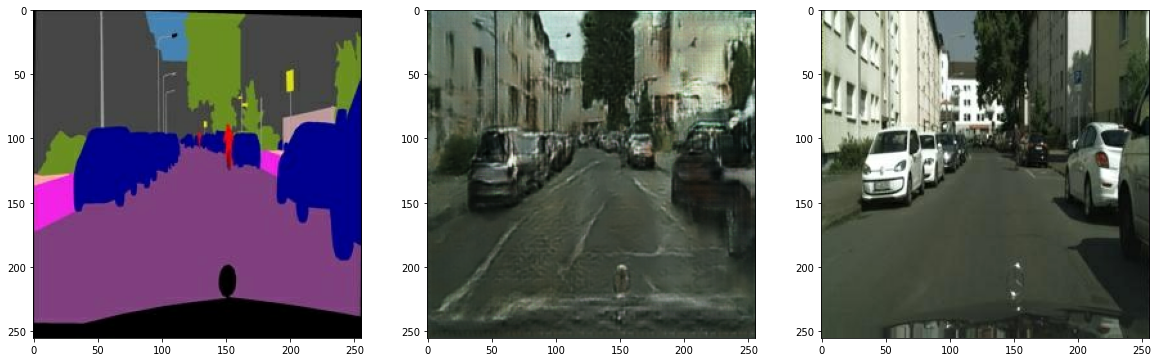

In [65]:
test_ind = 1

# test_path = Path.joinpath(Path.cwd(),''cityscapes','val')
test_path = 'cityscapes\\val\\'

f = test_path + os.listdir(test_path)[test_ind]
sketch, colored = load_img(f)

pred = generator(tf.expand_dims(sketch, 0))
pred = denormalize(pred)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1); plt.imshow(denormalize(sketch))
plt.subplot(1,3,2); plt.imshow(pred[0])
plt.subplot(1,3,3); plt.imshow(denormalize(colored))

이렇게 Encoder-Decoder Generator, U-Net Generator, Discriminator의 구현했음.

## 후기:  
### data augmentation은 크롭과 좌우반전 만 했다.
### loss 값으로 결과를 예측할 수 있는 것도 아니고 돌리는데 시간이 많이 걸려서 코드 손볼 엄두가 나지 않는다.